# In this notebook...

In this notebook, we'll try to imitate the work of Richard Wilkinson and Kate Pickett. In their famous book "The Spirit Level", they demonstrate how rising economic inequalities between individuals hurt societies as a whole.

For a quick overview, their work was presented in the following TED talk: https://www.ted.com/talks/richard_wilkinson#

It can also be well summarized with a single graph:

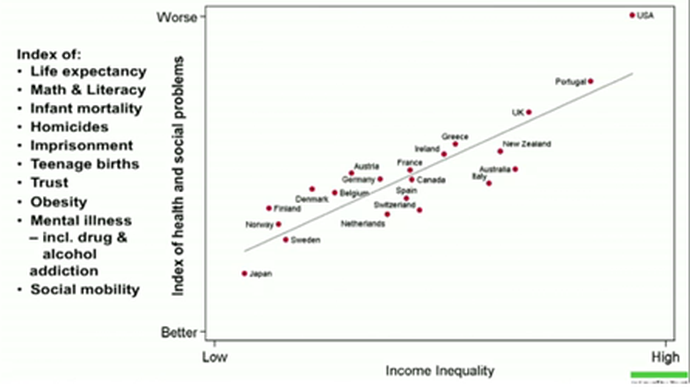

In [15]:
from IPython.display import Image
Image("spirit_level.png")

The more unequal the country, the more it suffers from drugs, alcohol, violence. The less its children will thrive at school (they'll even be more often bullied than their counterparts who live in more equal countries like, say, Sweden)

In this notebook, we'll try to see how economic inequalities affect, this time, electoral participation. A thriving democracy needs its citizens to vote. But what if, in order to feel compelled to vote, citizen needed to feel included ?

# Import libraries and load data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [31]:
WID_France = pd.read_csv('./WID_Data_Metadata/WID_France.csv', sep=';', quoting=0)

In [32]:
WID_France.head()
WID_France.shape #35 consecutive years of data on income and wealth distribution in France

,Year,Pre-tax national income Top 10% share,Pre-tax national income Top 1% share,Net personal wealth Top 10% share,Net personal wealth Top 1% share
0,1980,0.306266,0.081749,0.516458,0.172070
1,1981,0.301944,0.082140,0.509090,0.166747
2,1982,0.292819,0.075166,0.502454,0.161788
3,1983,0.294157,0.073301,0.500102,0.159277
4,1984,0.297160,0.074687,0.499754,0.158037


(35, 5)

In [33]:
idea = pd.read_csv('IDEA-oecd_turnout_80_2017.csv')

In [34]:
idea.head()
idea.shape

,Country,Election type,Year,Voter Turnout,Registration,Voting age population,Population,Compulsory voting
0,Australia,Parliamentary,2016,91.01 %,"15,671,551","18,063,010","22,992,654",Yes
1,Australia,Parliamentary,2013,93.23 %,"14,722,754","17,406,251","22,262,501",Yes
2,Australia,Parliamentary,2010,93.22 %,"14,086,869","16,208,479","21,515,754",Yes
3,Australia,Parliamentary,2007,94.76 %,"13,646,539","15,696,515","20,434,176",Yes
4,Australia,Parliamentary,2004,94.32 %,"13,098,461","14,999,498","19,913,144",Yes


(432, 8)

In [35]:
# So as to be able to plot it, we want to make "Voter Turnout" a float, striping it of its characters likes spaces and %
idea['Voter Turnout'] = idea['Voter Turnout'].astype(str).apply(lambda x: x.strip(' %')).astype(np.float64)

In [36]:
mask1 = idea['Country'] == 'France'
idea_France = idea[mask1]
idea_France.tail()

,Country,Election type,Year,Voter Turnout,Registration,Voting age population,Population,Compulsory voting
124,France,Presidential,2007,83.97,"44,472,733","48,651,555","63,713,926",No
125,France,Presidential,2002,79.71,"41,191,169","46,955,234","59,551,227",No
126,France,Presidential,1995,79.68,"39,976,944","44,080,760","58,007,000",No
127,France,Presidential,1988,84.20,"38,200,000","42,088,500","56,118,000",No
128,France,Presidential,1981,83.38,"36,398,762","39,395,480","53,966,000",No


In [37]:
France_Data = WID_France.merge(idea_France, how="inner")
France_Data.shape

(14, 12)

In [38]:
France_Data.head() 
# After merging the two databases, we get gor every election recorded since 1981 the income and wealth distribution 

,Year,Pre-tax national income Top 10% share,Pre-tax national income Top 1% share,Net personal wealth Top 10% share,Net personal wealth Top 1% share,Country,Election type,Voter Turnout,Registration,Voting age population,Population,Compulsory voting
0,1981,0.301944,0.08214,0.509090,0.166747,France,Parliamentary,70.87,"35,536,041","39,395,180","53,966,000",No
1,1981,0.301944,0.08214,0.509090,0.166747,France,Presidential,83.38,"36,398,762","39,395,480","53,966,000",No
2,1986,0.312102,0.08247,0.505658,0.167873,France,Parliamentary,78.48,"36,614,738","41,104,040","55,546,000",No
3,1988,0.325618,0.09155,0.504901,0.173698,France,Parliamentary,66.18,"36,977,321","42,088,500","56,118,000",No
4,1988,0.325618,0.09155,0.504901,0.173698,France,Presidential,84.20,"38,200,000","42,088,500","56,118,000",No


<p style="font-size:2.5vw; color:purple;"> Percentage of income as the mesure of economic inequality</p>

In [39]:
def label_point(x, y, val, ax):
    # x,y: where to place your label on the graph
    # val: what you want to write
    # ax: which graph you want to plot on
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(int(point['val'])))
        
def plot_reg(data, x, title):
    x = data[x]
    y = data['Voter Turnout']
    years = data['Year']
    
    ax = sns.regplot(x, y)
    ax.set(title=title)

    label_point(x, y, years, ax)

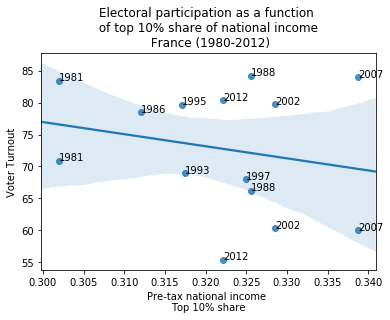

In [40]:
data = France_Data
x = 'Pre-tax national income \nTop 10% share'
title="Electoral participation as a function \n of top 10% share of national income \n France (1980-2012)"

plot_reg(data, x, title)

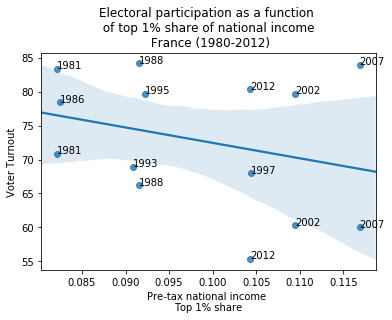

In [41]:
x = 'Pre-tax national income \nTop 1% share'
title = "Electoral participation as a function \n of top 1% share of national income \n France (1980-2012)"

plot_reg(data, x, title)

<p style="font-size:2.5vw; color:purple;"> Percentage of wealth as the mesure of economic inequality</p>
<p> Inequality is usually expressed in terms of income distribution ("of the total wealth produced this year, who gets what ?"). But as Thomas Picketty (head of Paris School of Economics) highlighted in his groundbreaking <em>Capital in the 21st Century</em>, the question might not be "how much do you earn" as much as "how much do you already possess". </p>

<p> Thus, using the same methods, we can try and see whether the top 10 and 1% shares of the net personnal wealth have an impact on electoral participation</p>


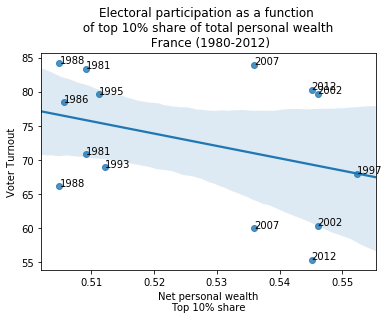

In [42]:
x = 'Net personal wealth\nTop 10% share'
title="Electoral participation as a function \n of top 10% share of total personal wealth \n France (1980-2012)"

plot_reg(data, x, title)

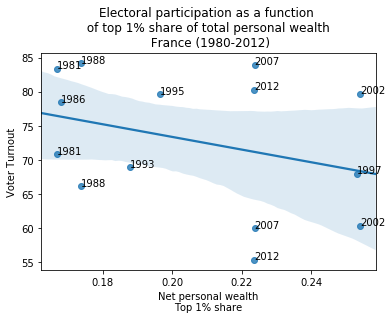

In [43]:
x = 'Net personal wealth\nTop 1% share'
title="Electoral participation as a function \n of top 1% share of total personal wealth \n France (1980-2012)"

plot_reg(data, x, title)

We'll get into the statistical details in a moment. For now let's just note that there seems to be a negative correlation between wealth/income concentration and voter turnout.

<p style="font-size:3vw; color:purple;">The case of the United States</p>

In [44]:
WID_USA = pd.read_csv('./WID_Data_Metadata/WID_United States.csv', sep=';', quoting=0)

In [45]:
WID_USA.head()
WID_USA.shape

,Year,Pre-tax national income Top 10% share,Pre-tax national income Top 1% share,Net personal wealth Top 10% share,Net personal wealth Top 1% share
0,1980,0.34243,0.10671,0.65102,0.23554
1,1981,0.34723,0.11052,0.64781,0.24417
2,1982,0.34898,0.11264,0.63527,0.24690
3,1983,0.35421,0.11514,0.62687,0.23737
4,1984,0.36660,0.12496,0.62089,0.23865


(35, 5)

In [46]:
maskUSA = (idea['Country'] == 'United States')
idea_USA = idea[maskUSA]
idea_USA.head(3)

,Country,Election type,Year,Voter Turnout,Registration,Voting age population,Population,Compulsory voting
403,United States,Parliamentary,2016,65.44,"214,109,367","250,293,421","323,995,528",No
404,United States,Parliamentary,2014,42.50,"190,669,639","245,712,915","318,892,103",No
405,United States,Parliamentary,2012,64.44,"193,653,908","240,926,957","312,780,968",No


In [47]:
USA_Data = WID_USA.merge(idea_USA, how="inner")

In [48]:
USA_Data.tail(3)

,Year,Pre-tax national income Top 10% share,Pre-tax national income Top 1% share,Net personal wealth Top 10% share,Net personal wealth Top 1% share,Country,Election type,Voter Turnout,Registration,Voting age population,Population,Compulsory voting
24,2012,0.47144,0.20779,0.74458,0.40098,United States,Parliamentary,64.44,"193,653,908","240,926,957","312,780,968",No
25,2012,0.47144,0.20779,0.74458,0.40098,United States,Presidential,66.66,"193,653,908","240,926,957","312,780,968",No
26,2014,0.47017,0.20200,0.72985,0.38562,United States,Parliamentary,42.50,"190,669,639","245,712,915","318,892,103",No


<p> Note : you don't actually have to merge the two datasets. However, it has the advantage of automatically getting rid of all the years for which we have economic data but during which no elections were held.
This way, the Series we get for X and Y have the same length and can be plotted more easily.</p>

[Text(0.5, 1.0, 'Electoral participation as a function \n of top 10% share of national income \n USA (1980-2012)')]

[Text(0.5, 1.0, 'Electoral participation as a function \n of top 1% share of national income \n USA (1980-2012)')]

[Text(0.5, 1.0, 'Electoral participation as a function \n of top 10% share of total personal wealth \n USA (1980-2012)')]

[Text(0.5, 1.0, 'Electoral participation as a function \n of top 1% share of total personal wealth \n USA (1980-2012)')]

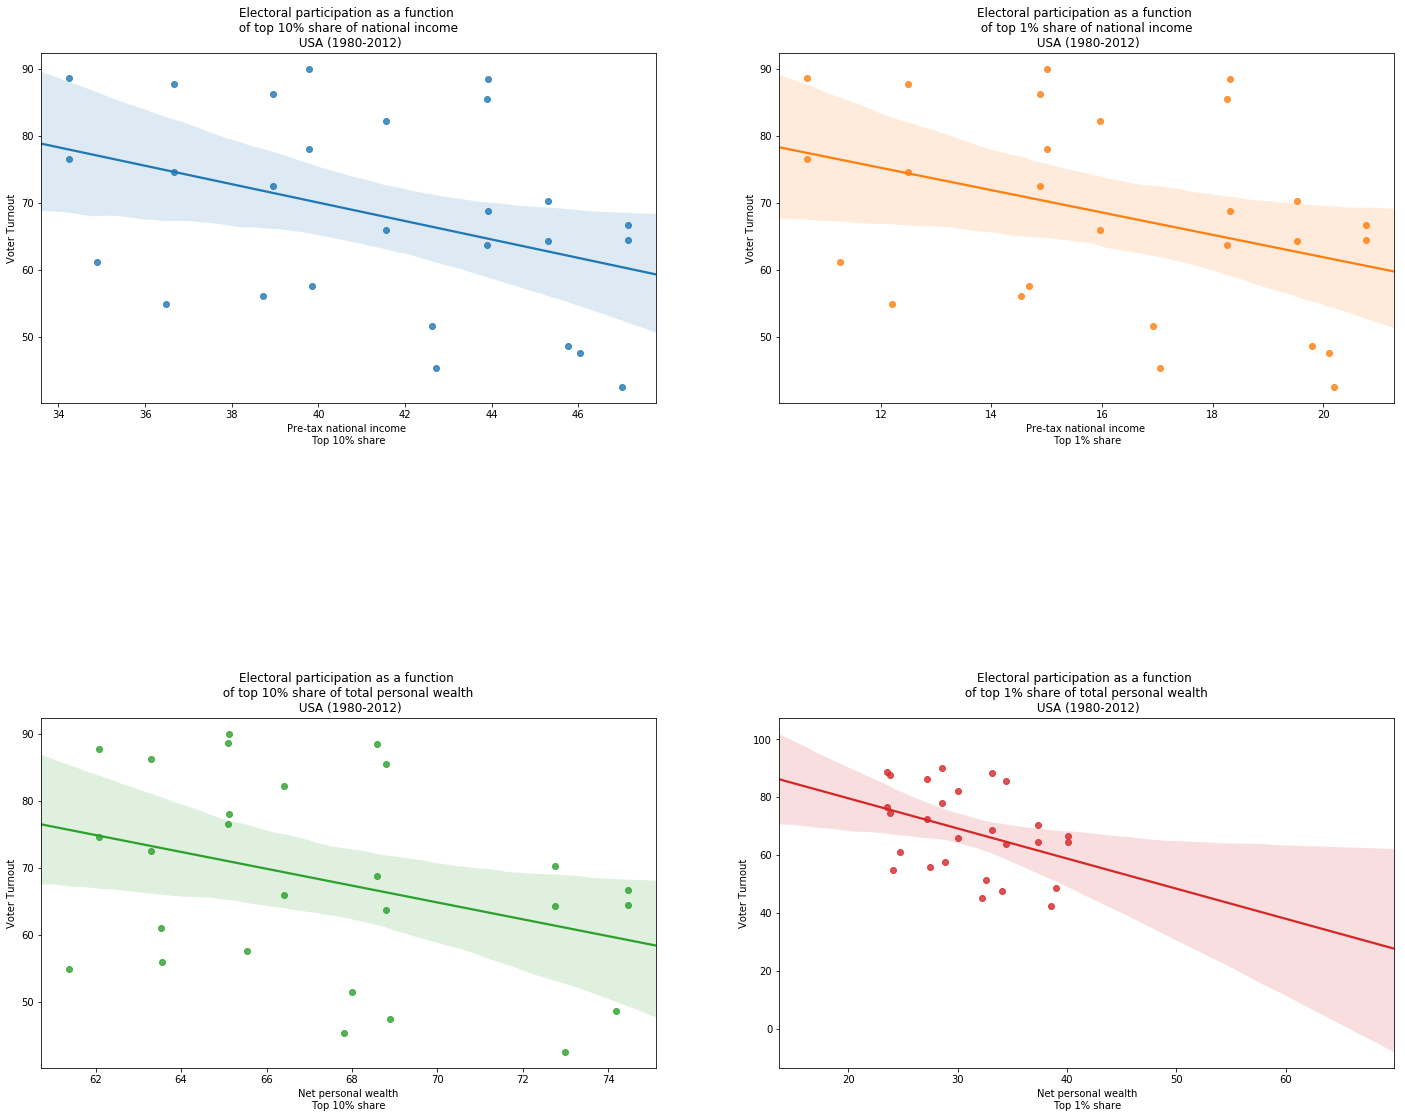

In [49]:
InteractiveShell.ast_node_interactivity='last_expr'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

plt.subplots_adjust(left=None, right=1.3, top=1.3, bottom=None,
                   wspace=0.2, hspace=0.9)

sns.regplot(USA_Data['Pre-tax national income \nTop 10% share']*100,
                USA_Data['Voter Turnout'],
           ax = axes[0,0])
sns.regplot(USA_Data['Pre-tax national income \nTop 1% share']*100,
                USA_Data['Voter Turnout'],
           ax = axes[0,1])
sns.regplot(USA_Data['Net personal wealth\nTop 10% share']*100,
                USA_Data['Voter Turnout'],
           ax = axes[1,0])
sns.regplot(USA_Data['Net personal wealth\nTop 1% share']*100,
                USA_Data['Voter Turnout'],
           ax = axes[1,1])

axes[0,0].set(title="Electoral participation as a function \n of top 10% share of national income \n USA (1980-2012)")
axes[0,1].set(title="Electoral participation as a function \n of top 1% share of national income \n USA (1980-2012)")
axes[1,0].set(title="Electoral participation as a function \n of top 10% share of total personal wealth \n USA (1980-2012)")
axes[1,1].set(title="Electoral participation as a function \n of top 1% share of total personal wealth \n USA (1980-2012)")

<p style="font-size:2.5vw; color:purple;">"Post Hoc, Ergo Propter Hoc": Causation or Correlation ? </p>

<p> There seem to be a relationship between economic inequality and the propension to vote. At least, this relationship holds for two countries : France and the USA</p>

<p> However, a correlation is not necessarily a causation. For example, if we could find a country where the participation rate has remained constant, but where economic inequality has risen as well, this would tend to (but not entirely) disprove the relationship</p>
<p> Let's look for a country where the parcipation rate remained constant for the last 35 years</p>

In [50]:
len(idea['Country'].unique().tolist())

33

In [51]:
change_over_years = idea.groupby('Country')['Voter Turnout'].agg(
    {'Change in Voter Turnout' : lambda x : x.max() - x.min()}
)
change_over_years = pd.DataFrame(change_over_years).reset_index()
change_over_years.sort_values('Change in Voter Turnout').head(6)

,Country,Change in Voter Turnout
0,Australia,4.76
19,Luxembourg,5.17
2,Belgium,5.34
6,Denmark,5.59
23,Norway,8.55
28,Spain,11.12


<p> We found four countries where the participation rate has remained somewhat constant over the years (a five percent difference between the best and the worst participation rate). </p>
<p> But we need to be careful : in certain countries, the vote is compulsory. Let's check : </p>

In [52]:
for country in ['Australia', 'Belgium', 'Denmark', 'Luxembourg']:
    print(country, ':',
          idea[idea['Country'] == country]['Compulsory voting'].unique())

Australia : ['Yes']
Belgium : ['Yes']
Denmark : ['No']
Luxembourg : ['Yes']


<p> So Denmark, without resorting to compulsory voting, has enjoyed a somewhat constant rate of participation. Let's take a closer look</p>

In [53]:
Denmark_Data = idea[idea['Country'] == 'Denmark']
Denmark_Data

,Country,Election type,Year,Voter Turnout,Registration,Voting age population,Population,Compulsory voting
78,Denmark,Parliamentary,2015,85.89,"4,145,105","4,431,291","5,581,503",No
79,Denmark,Parliamentary,2011,87.74,"4,079,910","4,374,759","5,529,888",No
80,Denmark,Parliamentary,2007,86.59,"4,022,920","4,186,873","5,468,120",No
81,Denmark,Parliamentary,2005,84.54,"4,003,616","4,161,254","5,413,392",No
82,Denmark,Parliamentary,2001,87.15,"3,998,957","4,132,213","5,352,815",No
83,Denmark,Parliamentary,1998,85.95,"3,993,009","4,128,398","5,225,820",No
84,Denmark,Parliamentary,1994,84.25,"3,988,787","4,111,950","5,205,000",No
85,Denmark,Parliamentary,1990,82.85,"3,941,499","4,060,600","5,140,000",No
86,Denmark,Parliamentary,1988,85.70,"3,911,897","4,052,700","5,130,000",No
87,Denmark,Parliamentary,1987,86.74,"3,907,454","3,947,790","5,127,000",No


<p style="font-size:2.5vw; color:purple;">"And it's surely to their credit": Denmark remains steady </p>

<p> Denmark has enjoyed, over the past 35 years, a steady participation rate, without resorting to compulsory voting. The data on wealth distribution is unavaiable for Denmark at this point, but we have data on income distribution :</p>

In [54]:
WID_Denmark = pd.read_csv('./WID_Data_Metadata/WID_Denmark.csv', sep=';', quoting=0)

In [55]:
WID_Denmark.head()

,Year,Pre-tax national income Top 10% share,Pre-tax national income Top 1% share,Net personal wealth Top 10% share,Net personal wealth Top 1% share
0,1980,0.258548,0.054718,NaN,NaN
1,1981,0.258196,0.053768,NaN,NaN
2,1982,0.252811,0.052137,NaN,NaN
3,1983,0.249949,0.052704,NaN,NaN
4,1984,0.247285,0.052644,NaN,NaN


[(0, 15),
 Text(209.74318181818177, 0.5, 'Pre-tax national income \nTop 1% share'),
 Text(0.5, 15.0, 'Year'),
 Text(0.5, 1.0, 'Pre-tax national income \nTop 1% share, Denmark')]

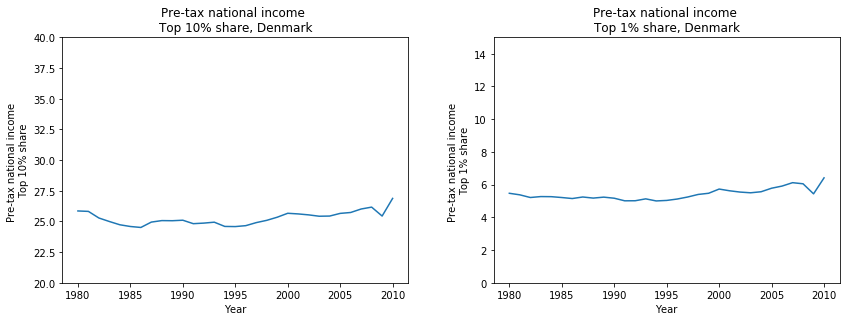

In [56]:
fig, ax = plt.subplots(ncols = 2)
fig.tight_layout()

plt.subplots_adjust(right=4.8, left=3)
ax[0].plot(WID_Denmark['Year'],WID_Denmark['Pre-tax national income \nTop 10% share']*100)
ax[0].set(title="Pre-tax national income \nTop 10% share, Denmark",
      ylim=(20,40),
      ylabel="Pre-tax national income \nTop 10% share",
      xlabel="Year")

ax[1].plot(WID_Denmark['Year'],WID_Denmark['Pre-tax national income \nTop 1% share']*100)
ax[1].set(title="Pre-tax national income \nTop 1% share, Denmark",
      ylim=(0,15),
      ylabel="Pre-tax national income \nTop 1% share",
      xlabel="Year")

Over the last 35 years, the share of the national income going to the top 10 (and top1) percent have remained somewhat steady.
This is especially clear when we compared these two curves with the evolution of the income distribution over the years for France and the USA :

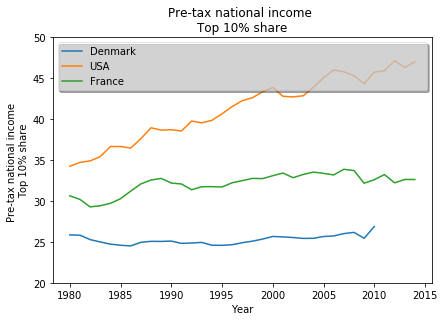

In [57]:
fig, ax = plt.subplots()
fig.tight_layout()
ax.plot(WID_Denmark['Year'],WID_Denmark['Pre-tax national income \nTop 10% share']*100, label="Denmark")
ax.plot(WID_USA['Year'],WID_USA['Pre-tax national income \nTop 10% share']*100, label="USA")
ax.plot(WID_France['Year'],WID_France['Pre-tax national income \nTop 10% share']*100, label="France")

ax.set(title="Pre-tax national income \nTop 10% share",
      ylim=(20,50),
      ylabel="Pre-tax national income \nTop 10% share",
      xlabel="Year")

leg = plt.legend(loc='best', mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)

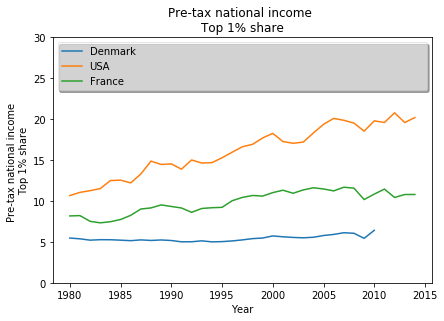

In [58]:
fig, ax = plt.subplots()
fig.tight_layout()
ax.plot(WID_Denmark['Year'],WID_Denmark['Pre-tax national income \nTop 1% share']*100, label="Denmark")
ax.plot(WID_USA['Year'],WID_USA['Pre-tax national income \nTop 1% share']*100, label="USA")
ax.plot(WID_France['Year'],WID_France['Pre-tax national income \nTop 1% share']*100, label="France")

ax.set(title="Pre-tax national income \nTop 1% share",
      ylim=(00,30),
      ylabel="Pre-tax national income \nTop 1% share",
      xlabel="Year")

leg = plt.legend(loc='best', mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)

<p> Insofar we've seen that, for the two countries where inequality has risen, electoral participation has plummeted, whereas in Denmark, the income distribution and the voter turnout has remained constant</p>
<p> These clues are not sufficient to prove a relationship : good participation in Dermark might come from the fact that its electoral system ensures a better representation of each single vote. But so far, they don't seem to contradict each other</p>
<p> To go further, we could compare the voter turnout and the economic inequality for the last known election for all OECD countries. We'll to just that in the next notebook</p>